In [94]:
import numpy as np 
import pandas as pd 
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sc-analysis/supply_chain_data.csv
/kaggle/input/supply-chain-analysis/supply_chain_data.csv


In [95]:
data = pd.read_csv('/kaggle/input/sc-analysis/supply_chain_data.csv')

In [96]:
data.shape

(100, 24)

In [97]:
data.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,55986.020440,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,10924.833130,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,90.557466,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,5076.557470,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,4185.587048,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [98]:
# Get column names
column_names = data.columns

# Display the column names
column_names

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [100]:
data.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [101]:
data.duplicated().any()

False

In [102]:
# Separate numerical and categorical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['Price', 'Availability', 'Number of products sold', 'Revenue generated', 'Stock levels', 'Lead times', 'Order quantities', 'Shipping times', 'Shipping costs', 'Lead time', 'Production volumes', 'Manufacturing lead time', 'Manufacturing costs', 'Defect rates', 'Costs']
Categorical Columns: ['Product type', 'SKU', 'Customer demographics', 'Shipping carriers', 'Supplier name', 'Location', 'Inspection results', 'Transportation modes', 'Routes']


In [103]:
data.describe()


,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,22855.499646,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,22846.027305,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,90.557466,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,5489.664502,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239830,43.500000,392.500000,13134.489900,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,37071.659918,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,87098.043650,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


# Creating Extra columns as per need to provide key insights

In [104]:
data['Production costs'] = data['Manufacturing costs'] + data['Shipping costs'] + data['Costs']

In [105]:
data['Net profit'] = data['Revenue generated'] - data['Production costs']

# Key Insights from data

In [106]:
Total_revenue = data['Revenue generated'].sum()
print("Total Revenue Generated is ",Total_revenue, "$")

Total Revenue Generated is  2285549.96463344 $


In [107]:
Total_profit = data['Net profit'].sum()
print("Total Profit Generated is ", Total_profit, "$")

Total Profit Generated is  2227343.9021866973 $


In [108]:
data['Profit percentage'] = (data['Net profit'] / Total_profit) * 100

In [109]:
# Identifying most sold product
max_sold_index = data['Number of products sold'].idxmax()
max_sold_product = data.loc[max_sold_index, ['Product type','SKU', 'Price',
                                             'Number of products sold','Revenue generated']]
print(max_sold_product)

Product type                 skincare
SKU                             SKU10
Price                       15.707796
Number of products sold           996
Revenue generated          15644.9645
Name: 10, dtype: object


In [110]:
# Identifying costly product
max_price_index = data['Price'].idxmax()
max_price_product = data.loc[max_price_index, ['Product type','SKU', 'Price', 
                                               'Number of products sold', 'Revenue generated']]
print(max_price_product)

Product type                  skincare
SKU                              SKU14
Price                        99.171329
Number of products sold            562
Revenue generated          55734.28669
Name: 14, dtype: object


In [111]:
# identifying product which generated most of the revenue
max_revenue_index = data['Revenue generated'].idxmax()
max_revenue_product = data.loc[max_revenue_index, ['Product type','SKU', 'Price',
                                                   'Number of products sold', 'Revenue generated']]
print(max_revenue_product )

Product type                  skincare
SKU                              SKU47
Price                        95.712136
Number of products sold            910
Revenue generated          87098.04365
Name: 47, dtype: object


In [112]:
# identifying product which generated most Profit
max_profit_index = data['Net profit'].idxmax()
max_profit_product = data.loc[max_revenue_index, ['Product type','SKU', 'Price', 'Number of products sold'
                                                  , 'Revenue generated','Net profit']]
print(max_profit_product )

Product type                   skincare
SKU                               SKU47
Price                         95.712136
Number of products sold             910
Revenue generated           87098.04365
Net profit                 86487.749551
Name: 47, dtype: object


In [113]:
# Filter products with negative profits
negative_profit_products = data[data['Net profit'] < 0]

# Display the products with negative profits
print(negative_profit_products[['SKU', 'Product type', 'Net profit']])

      SKU Product type  Net profit
2    SKU2     haircare  -90.105314
5    SKU5     haircare  -46.775337
97  SKU97     haircare -395.183526


Now, Here providing general visualizations of all products.

In [114]:
# Which Product type generated most revenue?
plot1 = px.bar(data, x = 'Product type', y = 'Revenue generated', title = "Revenue By Product Type ",
                    labels = {'Revenue generated': 'Revenue ($)', 'Product type': 'Product Type'},
                   hover_data={'SKU': True,'Number of products sold': True})
plot1.show()
                  

In [115]:
# Net Profit based on Product Type
plot3 = px.pie(data, values = 'Net profit', names='Product type', title='Profit by product type', hole=0.5)

plot3.update_traces(textposition='inside', textinfo='percent+label')

plot3.show()

In [116]:
# Visualization of top 10 products which generated most revenue
top_products = data.sort_values(by='Revenue generated', ascending=False).head(10)

In [117]:
plot4 = px.bar(top_products, x='SKU', y='Revenue generated', title='Top 10 Products by Revenue',
                        hover_data=['Product type', 'Price'])
plot4.show()

In [118]:
# Visualization of High sold products
high_sold = data.sort_values(by='Number of products sold', ascending=False).head(10)

In [119]:
# Which products sold in high volume? 
plot5 = px.bar(high_sold, x='SKU', y='Number of products sold', title='Most Sold Products',
                  labels = {'SKU': 'SKU', 'Number of products sold': 'Products Sold'},
              hover_data = ['Product type', 'Price', 'Revenue generated'])
plot5.show()

In [120]:
high_pc = data.sort_values(by='Production costs', ascending=False).head(10)

In [121]:
# Which products production cost is high? 
# (Production cost =  shipping cost + Manufacturing cost + Inventory storage cost)
plot6 = px.bar(high_pc, x='SKU', y='Production costs', title='Products With High Production Cost',
                  labels = {'SKU': 'SKU', 'Production costs': 'Production costs($)'},
              hover_data = ['Product type', 'Price', 'Revenue generated'])
plot6.show()

In [122]:
# Products Generated most profits
high_profits = data.sort_values(by='Net profit', ascending= False).head(10)

In [123]:
plot7 = px.bar(high_profits, x='SKU', y='Net profit', title='Products Contributed Most Profits',
                  labels = {'SKU': 'SKU', 'Net profit': 'Net profit($)'},
              hover_data = ['Product type', 'Price', 'Revenue generated','Production costs'],color = 'SKU')
plot7.show()

Here, Statistical calculations and Visualizations of supplier lead times.

In [124]:
data['Total lead time'] = data['Shipping times'] + data['Lead time'] + data['Manufacturing lead time']

In [125]:
plot9 = px.bar(data, x='SKU', y='Total lead time', title='Supply Chain Cycle Time Of Each Product',
                  labels = {'SKU': 'SKU', 'Total lead time': 'Production Time(days)'},
              hover_data = ['Product type', 'Production volumes'], 
               color = 'Total lead time')
plot9.show()

In [126]:
# Transform data to long format
data_long = pd.melt(data, id_vars=['SKU'], value_vars=['Lead time', 'Shipping times',
                   'Manufacturing lead time'], var_name='Time Type', value_name='Duration')

In [127]:
plot10 = px.bar(data_long, x='Duration', y='SKU', color='Time Type',
             title='Lead Time, Shipping Time, and Manufacturing Lead Time by SKU',
             labels={'Duration': 'Time(days)'})
plot10.update_layout(bargap=0.3)
plot10.update_traces(marker_line_color='black', marker_line_width=1.0)
plot10.show()

Based on supplier lead time and manufacturing time and demand rate, ERP system will calculate Re-order point to schedule raw material order from suppliers. ROP = (lead time x demand rate) + safety stock level.

Defects Rates visualizations

In [128]:
# Calculate mean defect rates by product Id
plot11 = px.bar(data, x='SKU', y='Defect rates', 
                title='Defect Rates By Product ID', color_discrete_sequence=px.colors.qualitative.Set3 )
plot11.show()

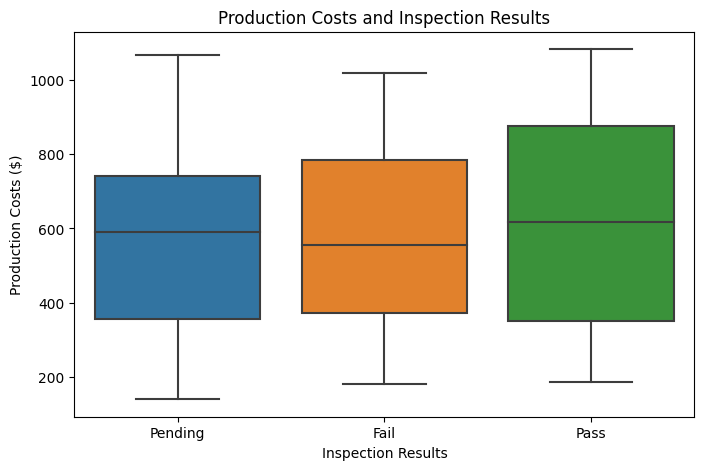

In [129]:
# Production Costs grouped by Inspection Results of lot

plt.figure(figsize=(8, 5))

sns.boxplot(x="Inspection results", y="Production costs", data=data)

plt.title("Production Costs and Inspection Results")

plt.ylabel("Production Costs ($)")

plt.xlabel("Inspection Results")

plt.show()

In [130]:
# Transform data to long format
data_long2 = pd.melt(data, id_vars='Product type', value_vars=['Production costs', 'Net profit'],
                        var_name='Metric', value_name='Amount')

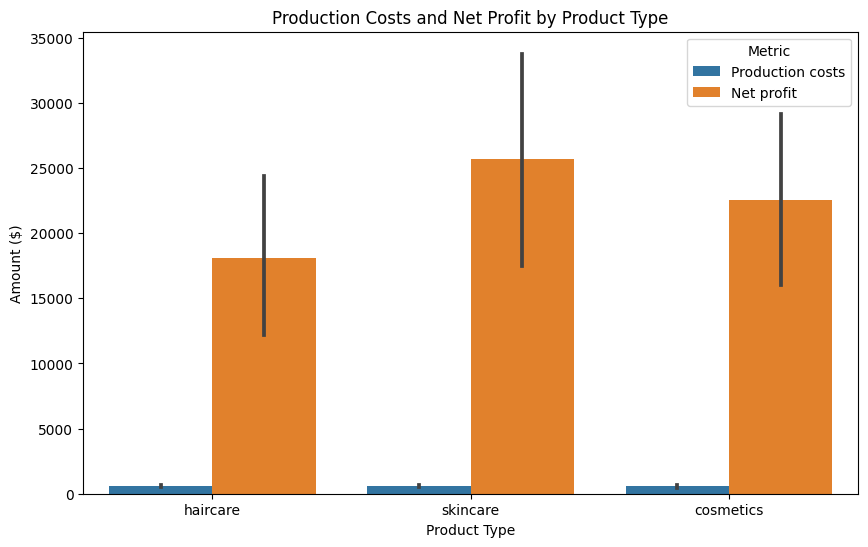

In [131]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the grouped bar plot
sns.barplot(x='Product type', y='Amount', hue='Metric', data=data_long2)

# Set the title and labels
plt.title('Production Costs and Net Profit by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Amount ($)')
plt.legend(title='Metric')

# Display the plot
plt.show()